In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [101]:
data = pd.read_csv('/Users/bartlomiejszafran/Desktop/fcc-forum-pageviews.csv', parse_dates= ['date'], index_col= 'date')

In [102]:
data.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [103]:
data = data[

    (data['value'] >= data['value'].quantile(0.025)) &
    (data['value'] <= data['value'].quantile(0.975))] 

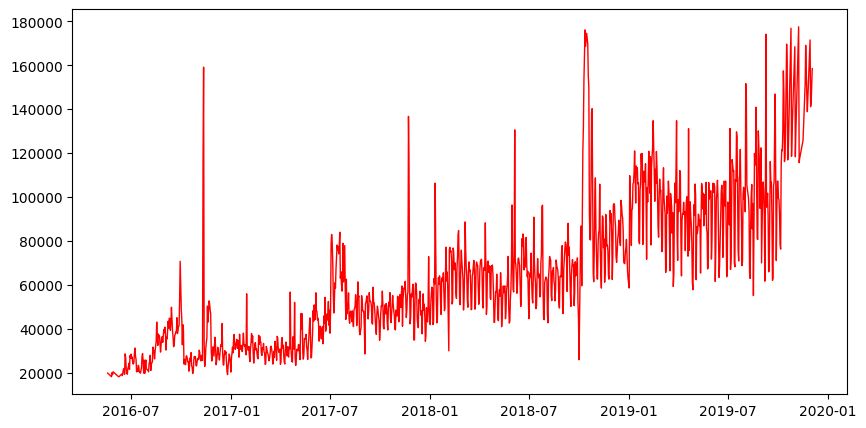

In [104]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data.index, data['value'], 'r', linewidth=1)  
      

In [105]:
data['month'] = data.index.month
data['year'] = data.index.year


In [106]:
data_bar = data.groupby(['year','month'])['value'].mean()
data_bar = data_bar.unstack()


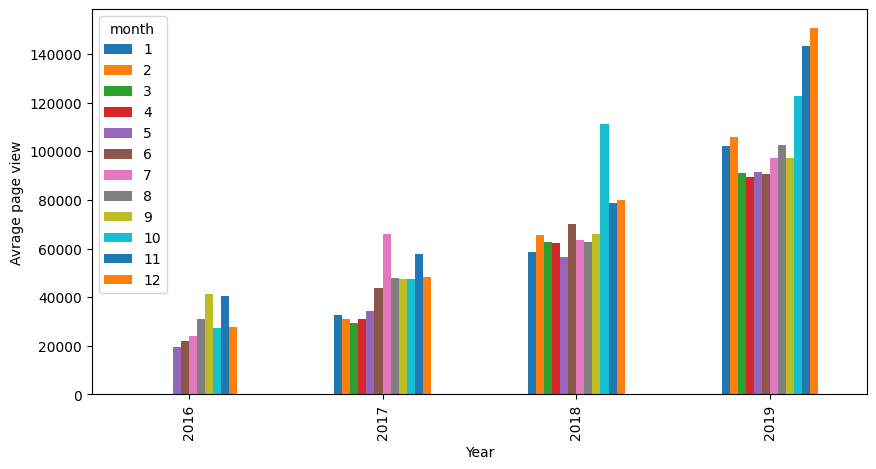

In [107]:
fig = data_bar.plot.bar(legend=True, figsize=(10,5), ylabel='Avrage page view', xlabel='Year').figure


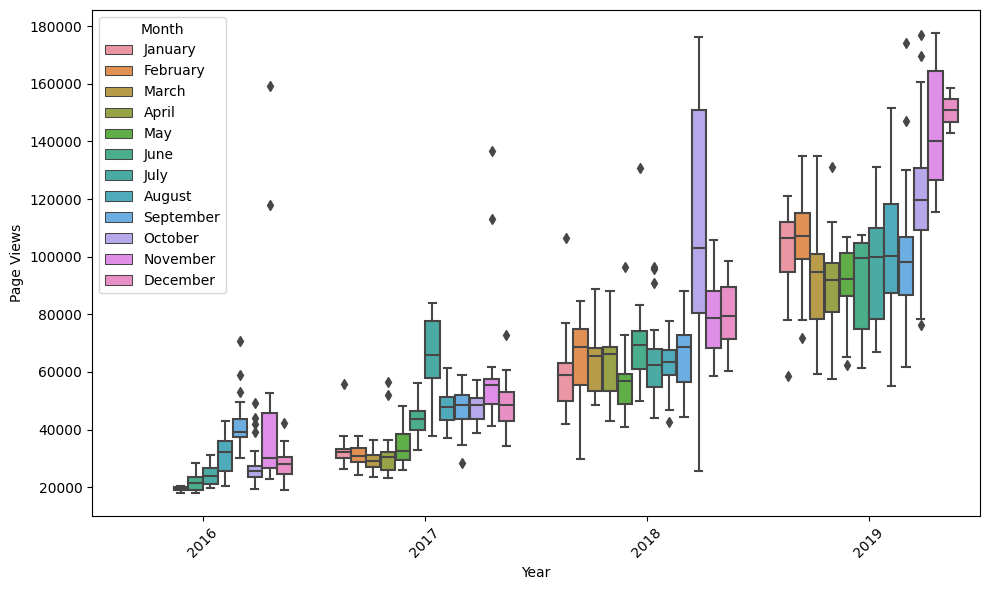

In [108]:
data_box = data.copy()
data_box.reset_index(inplace=True)
data_box['year'] = pd.DatetimeIndex(data_box['date']).year
data_box['month'] = pd.DatetimeIndex(data_box['date']).strftime('%B')
    
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    
data_box['month'] = pd.Categorical(data_box['month'], categories=month_order, ordered=True)
data_box.sort_values('month', inplace=True)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data_box, x='year', y='value', hue='month', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Page Views')
ax.legend(title='Month')
plt.xticks(rotation=45)
plt.tight_layout()
    